In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('emissions_reduction_data (1).csv')
data.head()

,energy_efficiency,renewable_ratio,technology_cost,emission_reduction
0,68.727006,0.373641,7569.984799,0
1,97.535715,0.332912,2660.607960,0
2,86.599697,0.176154,4119.757249,0
3,79.932924,0.607267,6969.525732,1
4,57.800932,0.476624,5338.804101,0


In [7]:
x=data[['energy_efficiency','renewable_ratio','technology_cost']]
y=data['emission_reduction']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [10]:
k=5
model=KNeighborsClassifier(k)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [11]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.99


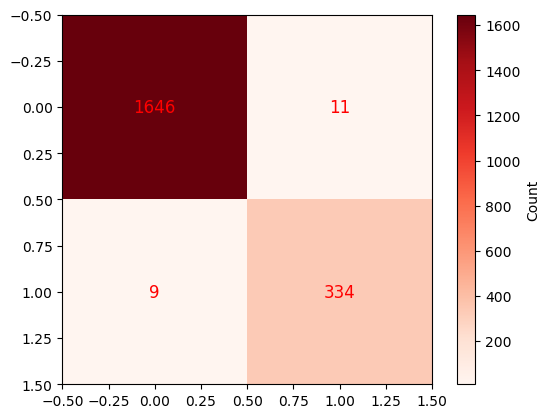

In [13]:
conf_matrix=confusion_matrix(y_test,y_pred)
plt.imshow(conf_matrix,cmap='Reds')
plt.colorbar(label='Count')

for i in range(conf_matrix.shape[0]):
               for j in range(conf_matrix.shape[1]):
                   plt.text(j,i,conf_matrix[i,j],ha='center',va='center',color='red',fontsize=12)
plt.show()

In [14]:
import joblib
joblib.dump(model,'lrmodel_emissions_reduction_data(1).csv.pl=kl')

['lrmodel_emissions_reduction_data(1).csv.pl=kl']